# Setup CCXT Library
Import required libraries including ccxt, pandas, and datetime for handling data operations.

In [2]:
# Import required libraries
import ccxt
import pandas as pd
from datetime import datetime

# Initialize Binance Exchange
Create a Binance exchange instance using ccxt without authentication for public data access.

In [3]:
# Initialize Binance Exchange
binance = ccxt.binance()  # Create a Binance exchange instance using ccxt without authentication for public data access

# Fetch OHLCV Data
Use fetch_ohlcv method to retrieve historical OHLCV data for Bitcoin with appropriate timeframe settings and date range calculations.

In [4]:
# Fetch OHLCV Data

# Define the symbol and timeframe
symbol = 'BTC/USDT'
timeframe = '1d'  # Daily data

# Calculate the date range
start_date = '2017-08-17T00:00:00Z'  # Start date (5 years ago from November 2024)
end_date = '2024-11-01T00:00:00Z'  # End date

# Convert dates to timestamps
start_timestamp = binance.parse8601(start_date)
end_timestamp = binance.parse8601(end_date)

# Fetch OHLCV data
ohlcv_data = []
while start_timestamp < end_timestamp:
    # Fetch data from the exchange
    ohlcv = binance.fetch_ohlcv(symbol, timeframe, since=start_timestamp, limit=1000)
    if not ohlcv:
        break
    ohlcv_data.extend(ohlcv)
    # Update the start timestamp to the last fetched timestamp + 1 millisecond
    start_timestamp = ohlcv[-1][0] + 1

# Convert the data to a DataFrame
columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume']
df = pd.DataFrame(ohlcv_data, columns=columns)

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Save the data to a CSV file
df.to_csv('bitcoin_ohlcv_data.csv', index=False)

# Save the data to a JSON file
df.to_json('bitcoin_ohlcv_data.json', orient='records', date_format='iso')

# Data Processing and Storage
Convert the OHLCV data into a pandas DataFrame with proper column names and datetime index.

In [5]:
# Data Processing and Storage

# Convert the OHLCV data into a pandas DataFrame with proper column names and datetime index
columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume']
df = pd.DataFrame(ohlcv_data, columns=columns)

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Set the timestamp as the index
df.set_index('timestamp', inplace=True)

# Save the data to a CSV file
df.to_csv('bitcoin_ohlcv_data.csv')

# Save the data to a JSON file
df.to_json('bitcoin_ohlcv_data.json', orient='records', date_format='iso')

# Data Visualization Check
Create a basic plot of the fetched data to verify successful data retrieval and processing.

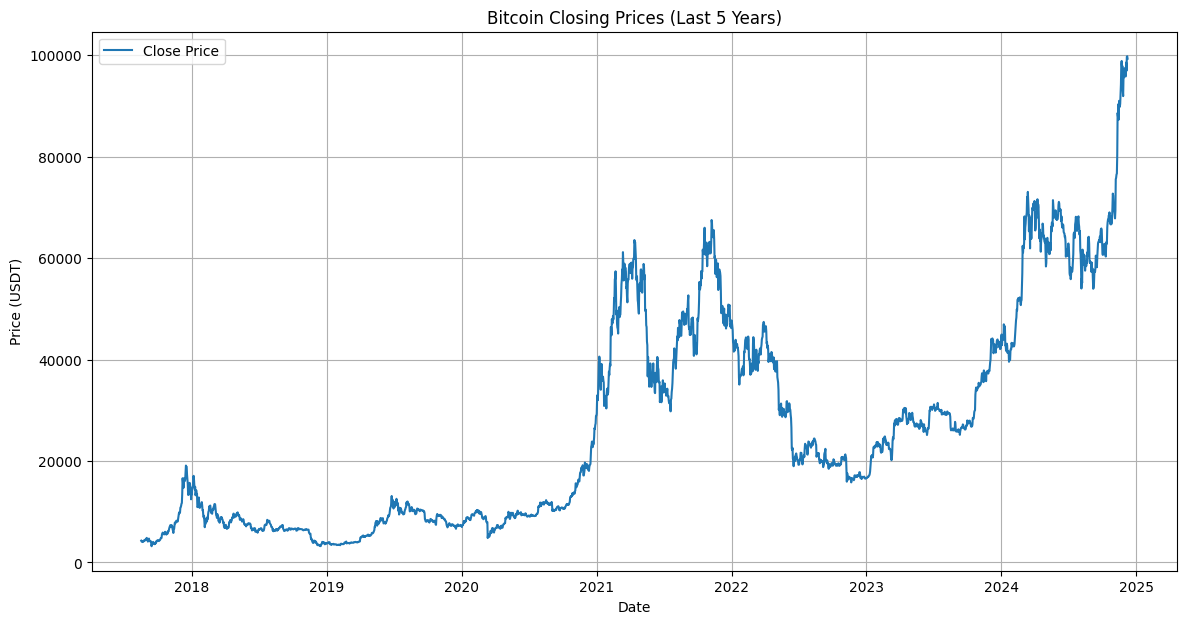

In [6]:
# Data Visualization Check

import matplotlib.pyplot as plt

# Plot the closing prices
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price')
plt.title('Bitcoin Closing Prices (Last 5 Years)')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid(True)
plt.show()